# Visualisations

In [21]:
import pandas as pd
import time
import os
import operator
import sys
import re

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from src.neural_backend.load_data import load_data, get_data_sem_eval, get_data_sent_140
from src.neural_backend.load_embeddings import read_embeddings_file, load_embeddings

plt.rcParams["figure.facecolor"] = 'w'
plt.rcParams["axes.facecolor"] = 'w'
plt.rcParams['axes.facecolor'] = 'w'

In [2]:
# Paths to glove embeddings.
# glove_path = './data/embeddings/glove.twitter.27B.200d.txt'
glove_path = '../data/embeddings/glove.42B.300d.txt'
# embed_dims = 200
embed_dims = 300
embed_type = 'GLOVE'
MAX_FEATS = 150000
sem_eval_path = '../data/sem_eval/full/'
sent_140_path = './data/sent_140/training.1600000.processed.noemoticon.csv'
sem_eval_2017_path = '../data/sem_eval/2017_dataset/'

In [3]:
embedding_index_twitter = read_embeddings_file('../data/embeddings/glove.twitter.27B.200d.txt', 'GLOVE')
embedding_index_common = read_embeddings_file('../data/embeddings/glove.42B.300d.txt', 'GLOVE')
sem_eval = get_data_sem_eval('../data/sem_eval/full/')

Reading GLOVE file...


1193514it [01:14, 16051.32it/s]


Reading GLOVE file...


1917494it [02:45, 11598.46it/s]


neutral     22211
positive    19625
negative     7732
Name: class, dtype: int64


In [4]:
(x_train, y_train), (x_val, y_val), word_index, num_classes = load_data(path=sem_eval_path,
                                                           data_set='sem_eval',
                                                           max_features=MAX_FEATS)
embedding_matrix = load_embeddings(path=glove_path,
                                   embedding_type=embed_type,
                                   word_index=word_index,
                                   max_features=MAX_FEATS,
                                   embedding_dimensions=embed_dims)

neutral     22211
positive    19625
negative     7732
Name: class, dtype: int64


49568it [00:27, 1801.15it/s]


Number of Data Samples:49568
Loading GLOVE embeddings...
Reading GLOVE file...


1917494it [02:44, 11650.54it/s]


Generating embedding matrix...


100%|████████████████████████████████████████████████████████████████████████| 40693/40693 [00:00<00:00, 288605.70it/s]


40694 Unique words (vocab size).
4426 Unique OOV words.


In [28]:
def tsne_plot(model, points=100, embed_dim=300):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = np.zeros((len(model) + 1, embed_dim), dtype=np.float32)
    
    i = 0
    for word in model:
        tokens[i] = model[word]
        labels.append(word)
        
        i+=1
    
    tokens = np.array(tokens[:points], dtype=np.float32)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

c:\users\chris\anaconda3\envs\chris-dl\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


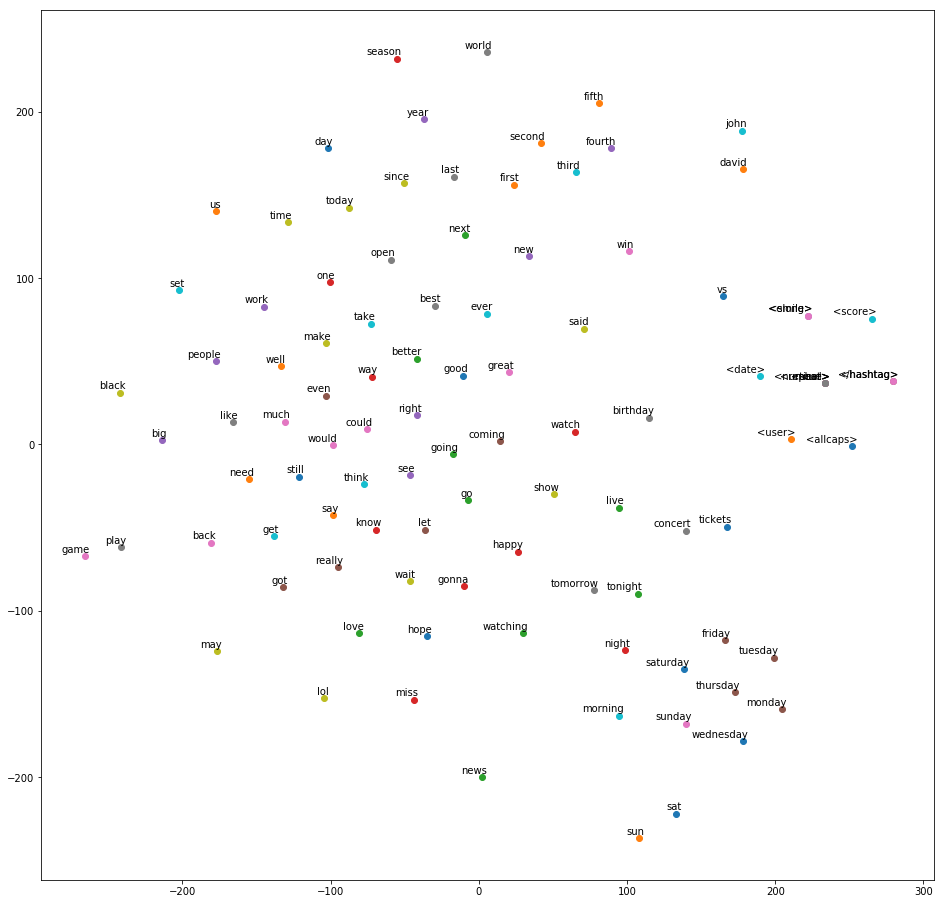

In [32]:
embedding_index = embedding_index_common

new_index = {}
punct = set([',', '.', "'t", '?', '!', "'", "'s",'th'])
STOP_WORDS = stopwords.words()
for word in word_index:
    if not word in punct and not word in STOP_WORDS:
        new_index[word] = embedding_index.get(word, np.zeros((embed_dims,)))
        
tsne_plot(new_index)

In [25]:
(x_train_2, y_train_2), (x_val_2, y_val_2), word_index_2, num_classes = load_data(path=sem_eval_path,
                                                           data_set='sem_eval',
                                                           max_features=MAX_FEATS)
embedding_matrix_2 = load_embeddings(path='../data/embeddings/glove.twitter.27B.200d.txt',
                                   embedding_type=embed_type,
                                   word_index=word_index,
                                   max_features=MAX_FEATS,
                                   embedding_dimensions=200)

neutral     22211
positive    19625
negative     7732
Name: class, dtype: int64




0it [00:00, ?it/s]

187it [00:00, 1833.32it/s]

357it [00:00, 1762.96it/s]

537it [00:00, 1777.92it/s]

712it [00:00, 1773.18it/s]

887it [00:00, 1763.28it/s]

1061it [00:00, 1760.77it/s]

1237it [00:00, 1760.60it/s]

1414it [00:00, 1761.77it/s]

1596it [00:00, 1767.24it/s]

1786it [00:01, 1780.16it/s]

1970it [00:01, 1786.40it/s]

2151it [00:01, 1786.87it/s]

2335it [00:01, 1790.95it/s]

2516it [00:01, 1791.03it/s]

2697it [00:01, 1791.70it/s]

2878it [00:01, 1791.16it/s]

3058it [00:01, 1790.11it/s]

3238it [00:01, 1783.26it/s]

3414it [00:01, 1763.63it/s]

3581it [00:02, 1753.43it/s]

3758it [00:02, 1754.21it/s]

3926it [00:02, 1745.84it/s]

4092it [00:02, 1741.81it/s]

4277it [00:02, 1746.23it/s]

4463it [00:02, 1750.35it/s]

4644it [00:02, 1752.27it/s]

4829it [00:02, 1754.86it/s]

5018it [00:02, 1759.30it/s]

5204it [00:02, 1762.71it/s]

5387it [00:03, 1764.91it/s]

5570it [00:03, 1764.71it/s]

5752it [00:03, 1764.51it/s]

5932it [00:03, 1756.15it/s]

6117it [00:03, 1758.85it/s

49002it [00:28, 1721.78it/s]

49177it [00:28, 1721.12it/s]

49351it [00:28, 1721.16it/s]

49537it [00:28, 1721.64it/s]

49568it [00:28, 1721.58it/s]

Number of Data Samples:49568
Loading GLOVE embeddings...
Reading GLOVE file...




0it [00:00, ?it/s]

1518it [00:00, 14882.88it/s]

2934it [00:00, 14560.94it/s]

4397it [00:00, 14559.72it/s]

5859it [00:00, 14556.64it/s]

7329it [00:00, 14570.67it/s]

8810it [00:00, 14598.23it/s]

10210it [00:00, 14523.54it/s]

11602it [00:00, 14430.41it/s]

13023it [00:00, 14398.06it/s]

14421it [00:01, 14356.45it/s]

15831it [00:01, 14326.74it/s]

17233it [00:01, 14301.28it/s]

18676it [00:01, 14311.03it/s]

20081it [00:01, 14275.87it/s]

21480it [00:01, 14200.34it/s]

23023it [00:01, 14272.16it/s]

24646it [00:01, 14389.72it/s]

26311it [00:01, 14510.40it/s]

27849it [00:01, 14521.69it/s]

29367it [00:02, 14471.84it/s]

30973it [00:02, 14546.43it/s]

32576it [00:02, 14612.98it/s]

34114it [00:02, 14639.63it/s]

35716it [00:02, 14696.42it/s]

37338it [00:02, 14756.64it/s]

38952it [00:02, 14809.24it/s]

40549it [00:02, 14851.75it/s]

42167it [00:02, 14896.04it/s]

43814it [00:02, 14947.21it/s]

45478it [00:03, 15000.57it/s]

47101it [00:03, 14951.50it/s]

48717it [00:03, 14990.9

413176it [00:26, 15622.63it/s]

414749it [00:26, 15621.57it/s]

416374it [00:26, 15624.22it/s]

418022it [00:26, 15627.42it/s]

419641it [00:26, 15628.93it/s]

421245it [00:26, 15629.88it/s]

422845it [00:27, 15627.49it/s]

424466it [00:27, 15629.60it/s]

426086it [00:27, 15631.70it/s]

427697it [00:27, 15633.42it/s]

429315it [00:27, 15635.41it/s]

430951it [00:27, 15637.76it/s]

432563it [00:27, 15636.11it/s]

434203it [00:27, 15638.86it/s]

435833it [00:27, 15640.96it/s]

437458it [00:27, 15643.13it/s]

439071it [00:28, 15637.07it/s]

440625it [00:28, 15631.45it/s]

442204it [00:28, 15632.29it/s]

443812it [00:28, 15633.87it/s]

445435it [00:28, 15635.96it/s]

447083it [00:28, 15638.36it/s]

448712it [00:28, 15640.64it/s]

450338it [00:28, 15642.79it/s]

451958it [00:28, 15644.67it/s]

453570it [00:28, 15643.34it/s]

455162it [00:29, 15641.61it/s]

456775it [00:29, 15643.55it/s]

458416it [00:29, 15645.63it/s]

460013it [00:29, 15647.00it/s]

461647it [00:29, 15649.35it/s]

463283it

828095it [00:52, 15741.88it/s]

829706it [00:52, 15742.43it/s]

831294it [00:52, 15742.67it/s]

832925it [00:52, 15743.74it/s]

834537it [00:53, 15744.16it/s]

836132it [00:53, 15735.00it/s]

837704it [00:53, 15735.10it/s]

839345it [00:53, 15736.32it/s]

840969it [00:53, 15737.11it/s]

842597it [00:53, 15737.98it/s]

844240it [00:53, 15739.12it/s]

845884it [00:53, 15740.43it/s]

847528it [00:53, 15741.73it/s]

849162it [00:53, 15742.69it/s]

850785it [00:54, 15735.73it/s]

852423it [00:54, 15737.04it/s]

853979it [00:54, 15731.21it/s]

855607it [00:54, 15732.33it/s]

857225it [00:54, 15733.15it/s]

858865it [00:54, 15734.23it/s]

860493it [00:54, 15735.23it/s]

862122it [00:54, 15736.23it/s]

863748it [00:54, 15737.17it/s]

865366it [00:54, 15737.96it/s]

866995it [00:55, 15738.82it/s]

868633it [00:55, 15739.84it/s]

870265it [00:55, 15740.75it/s]

871909it [00:55, 15741.99it/s]

873541it [00:55, 15743.03it/s]

875170it [00:55, 15741.04it/s]

876755it [00:55, 15739.51it/s]

878357it

Generating embedding matrix...




  0%|                                                                                        | 0/40690 [00:00<?, ?it/s]

 76%|██████████████████████████████████████████████████████▊                 | 30978/40690 [00:00<00:00, 306721.35it/s]

100%|████████████████████████████████████████████████████████████████████████| 40690/40690 [00:00<00:00, 303549.10it/s]

40691 Unique words (vocab size).
5954 Unique OOV words.


c:\users\chris\anaconda3\envs\chris-dl\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


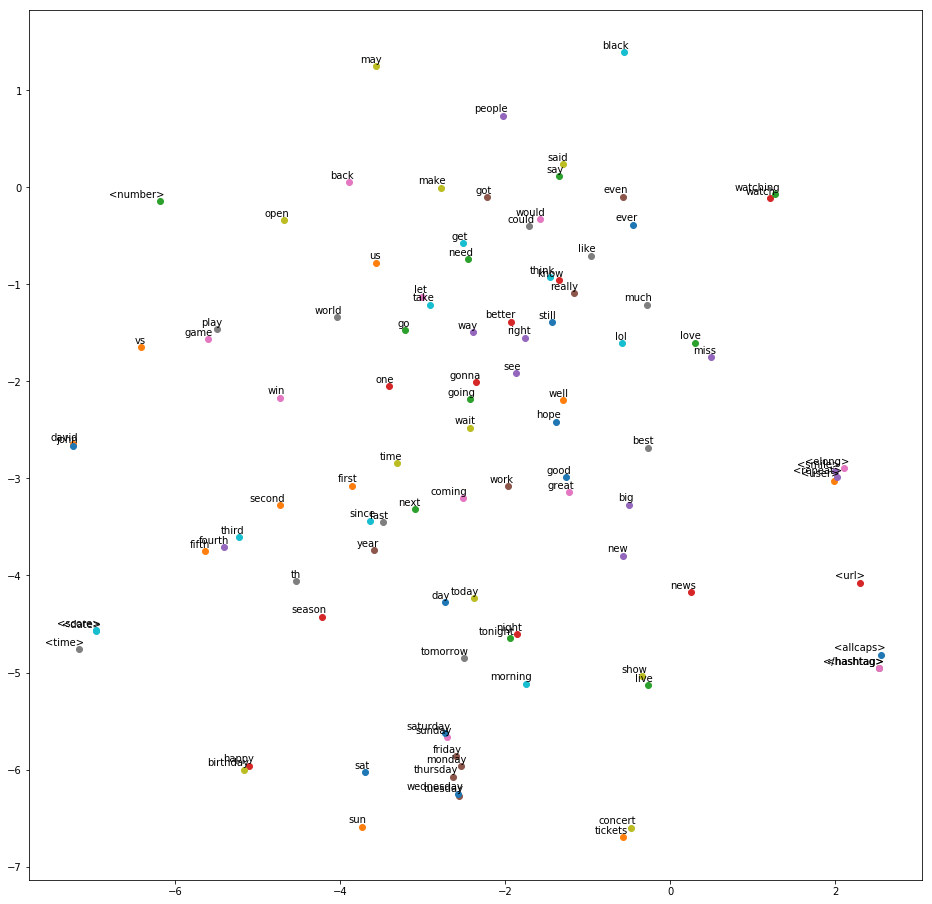

In [31]:
embedding_index_2 = embedding_index_twitter

new_index_2 = {}

for word in word_index_2:
    if not word in punct and not word in STOP_WORDS:
        new_index_2[word] = embedding_index_2.get(word, np.zeros((200,)))
        
tsne_plot(new_index_2, embed_dim=200)